In [2]:
import cv2

#### 이미지 불러오기

In [4]:
# imread() : 외부 이미지를 읽어옴
# cv2.IMREAD_COLOR : 이미지를 칼라 이미지로 설정
ryan = cv2.imread("./image/ryan.jpg", cv2.IMREAD_COLOR)

#### 이미지를 matplotlib으로 출력하기

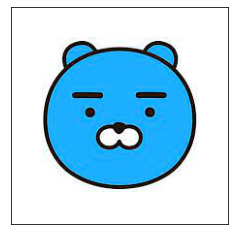

In [6]:
import matplotlib.pyplot as plt

# 눈금은 삭제 xticks([]), yticks([])
plt.xticks([])
plt.yticks([])

plt.imshow(ryan)

- OpenCV로 불러온 이미지가 matplotlib으로 출력할 때 색깔이 변경된다는 문제가 생김
- OpenCV에서 사용하는 칼라공간 : RGB(Red, Green, Blue) - 색상의 파장에 따라 배치
- Python에서 사용하는 칼라공간 : BGR - 알파벳 순으로 배치

- 이미지의 Red와 Blue를 변경 : cvtColor() 함수를 사용

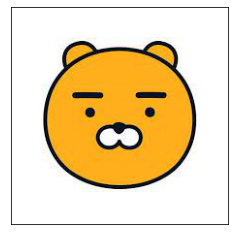

In [7]:
# cv2.COLOR_RGB2BGR : RGB -> GBR
ryan = cv2.cvtColor(ryan, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])

plt.imshow(ryan)

#### 이미지처리에서 사용하는 색상

- Color 이미지 : RGB로 구성된 이미지
    - Red, Green, Blue 각각 8비트로 구성되어있음 (0 - 255)
    - 트루칼라 : 24비트
    - ARGB : Alpha (투명도)
    - RGB 칼라 색상의 단점 : 복잡, 빛에 의해 영향을 받음
- 흑백(gray) 이미지
    - RGB의 채널을 평균(R+G+B / 3)을 내서 하나의 채널의 채널 통합 (0 - 255)
- 이진(binary) 이미지
    - 0과 255(1)로만 구성된 이미지

#### 흑백이미지로 변환

- 이미지를 읽을 때 흑백이미지로 읽는 방법(cv2.IMREAD_GRAYSCALE)
- 칼라 이미지로 읽어서 흑백이미지 변환하는 방법(cv2.cvtColor())
    - 출력용으로 칼라 이미지가 필요한 경우

- 칼라 이미지를 읽을 때 흑백이미지로 변환해서 읽기

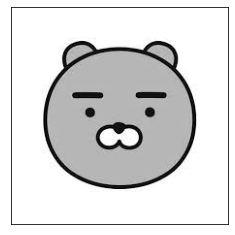

In [9]:
ryan_gray = cv2.imread("./image/ryan.jpg", cv2.IMREAD_GRAYSCALE)

plt.xticks([])
plt.yticks([])

# cmap = "gray" : 출력모드를 흑백으로 설정
plt.imshow(ryan_gray, cmap = "gray")

- 칼라이미지로 읽어서 흑백이미지로 변환하는 방법

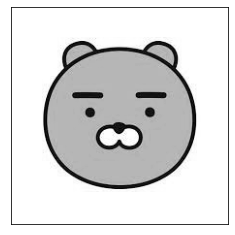

In [10]:
ryan = cv2.imread("./image/ryan.jpg", cv2.IMREAD_COLOR)

# BGR2GRAY : RGB -> GBR -> Gray
ryan_gray = cv2.cvtColor(ryan, cv2.COLOR_BGR2GRAY)

plt.xticks([])
plt.yticks([])

plt.imshow(ryan_gray, cmap = "gray")

#### 이진 이미지로 변환하기

- 마스크 패턴을 생성, 이진 이미지 처리를 하는 경우
- 칼라이미지를 gray 이미지로 변환한 후에 이진 이미지로 변환

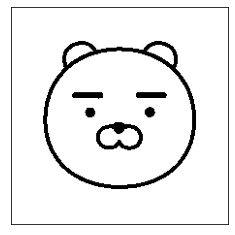

In [13]:
# threshold() : 흑백이미지를 이진 이미지로 변환하는 함수
# threshold(변환할 이미지, 기준값, 기준값에 따른 결과값, 변환방법)
# 만약 픽셀값이 128보다 크면 255로 값을 변경 (cv2.THRESH_BINARY)
# 만약 픽셀값이 128보다 작으면 0으로 값을 변경
# _ : threshold()는 리턴값이 2개 있는데 첫번째 리턴값을 안 받겠다는 의미

_, ryan_bin = cv2.threshold(ryan_gray, 128, 255, cv2.THRESH_BINARY) # cv2.THRESH_BINARY_INV 설정하면 반대로 설정됨

plt.xticks([])
plt.yticks([])

plt.imshow(ryan_bin, cmap = "gray")

#### 동영상 파일을 가져오거나 카메라를 연동하기

In [22]:
import cv2

# VideoCapture() : 비디오 파일이나 카메라를 연동
cap = cv2.VideoCapture("./image/video.mp4")

# 카메라를 사용하는 경우 (줌 같은 다른 프로그램에서 카메라를 사용중이라면 연동 안됨)
# cap = cv2.VideoCapture(0) # 0을 넣으면 카메라 연동

#### 연동한 카메라나 동영상으로부터 이미지를 읽어서 출력

- 초당 30장의 이미지 출력

In [19]:
while True:
    # 비디오에서 이미지를 한장씩 가져온다
    # ret : 이미지를 잘 읽었으면 True를 반환
    # frame : 읽은 이미지가 저장
    ret, frame = cap.read()
    
    # 이미지를 읽지 못했거나 영상이 모두 실행된 경우 발생하는 오류에 따른 예외처리
    if not ret:
        print("비디오 읽기 실패")
        cap.release()            # 비디오 중지
        cv2.destroyAllWindows()  # 띄운 새창을 모두 닫아준다
        break                   # while 반복문 중지
        
    # 읽은 이미지를 출력(새 창을 띄워서 출력)
    cv2.imshow("video", frame)
    
    # 초당 30장의 이미지 출력되도록 함
    # 이미지 한장을 출력하고 33/1000 동안 키 입력을 대기
    key = cv2.waitKey(33)
    
    # 무한루프를 멈춰주는 기능
    if key == 49 :              # 숫자 1키를 의미(아스키코드) -> 1키 누르면 창 닫아줌
        cap.release()            # 비디오 중지
        cv2.destroyAllWindows()  # 띄운 새창을 모두 닫아준다
        break                    # while 반복문 중지

#### 영상 녹화 기능 구현(CCTV 구현)

In [20]:
# 녹화 기능 설정(속도, 화면크기, 코덱)

# 속도 (초당 몇 장의 이미지를 출력하게 할 것인지)
fps = 30.0

# 화면 크기
width = int(cap.get(3))   # 원 영상의 가로 크기를 실수로 가져온다
height = int(cap.get(4))  # 원 영상의 세로 크기를 실수로 가져온다

# 코덱 설정
codec = cv2.VideoWriter_fourcc(*"DIVX")  # avi 파일 코덱

# 녹화 파일 설정 (파일명, 코덱, 속도, 화면크기)
out = cv2.VideoWriter("./image/cctv.avi", codec, fps, (width, height))

In [23]:
record = False   # 시작 시에는 녹화가 되지 않도록 설정

while True:
    ret, frame = cap.read()
    
    if not ret:
        cap.release()          
        cv2.destroyAllWindows()  
        break
    cv2.imshow("cctv", frame)
    
    if record:
        # 현재 이미지를 녹화 파일에 쓴다
        out.write(frame)
        
    key = cv2.waitKey(33)
    
    if key == 49:
        print("녹화를 종료합니다")
        cap.release()
        cv2.destroyAllWindows()
        break
    if key == 50:       # 숫자 2키를 누르면
        record = True   # 녹화가 가능하도록 설정

녹화를 종료합니다
